<a id = '5.5'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Flight Price Prediction</strong></p>

In [1]:
#importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.model_selection import train_test_split
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploads=files.upload()

Saving Data_Train.xlsx to Data_Train.xlsx


In [3]:
data=pd.read_excel('/content/Data_Train.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data.Date_of_Journey=data.Date_of_Journey.str.split('/')

In [7]:
data.Date_of_Journey

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10682, dtype: object

In [8]:
data['Date']=data.Date_of_Journey.str[0]
data['Month']=data.Date_of_Journey.str[1]
data['Year']=data.Date_of_Journey.str[2]

In [9]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [10]:
data.Route=data.Route.str.split('→')


In [11]:
data.Route

0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10682, dtype: object

In [12]:
data['City1']=data.Route.str[0]
data['City2']=data.Route.str[1]
data['City3']=data.Route.str[2]
data['City4']=data.Route.str[3]
data['City5']=data.Route.str[4]
data['City6']=data.Route.str[5]


In [13]:
data.Dep_Time=data.Dep_Time.str.split(':')


In [14]:
data['Dep_Time_Hour']=data.Dep_Time.str[0]
data['Dep_Time_Mins']=data.Dep_Time.str[1]

In [15]:
data.Arrival_Time=data.Arrival_Time.str.split(':')

In [16]:
data['Arrival_Time_Hour']=data.Arrival_Time.str[0]
data['Arrival_Time_Mins']=data.Arrival_Time.str[1]

In [17]:

data.Arrival_Time_Mins=data.Arrival_Time_Mins.str.split(' ')
data['Arrival_Time_Mins']=data.Arrival_Time_Mins.str[0]
data['Arrival_Day']=data.Arrival_Time_Mins.str[1]

In [18]:
data.Duration=data.Duration.str.split(' ')

In [19]:
data['Travel_Hours']=data.Duration.str[0]
data['Travel_Hours']=data['Travel_Hours'].str.split('h')
data['Travel_Hours']=data['Travel_Hours'].str[0]
data.Travel_Hours=data.Travel_Hours
data['Travel_Mins']=data.Duration.str[1]

In [20]:
data['Travel_Mins']=data['Travel_Mins'].str.split('m')
data['Travel_Mins']=data['Travel_Mins'].str[0]

In [21]:

data.Total_Stops=data.Total_Stops.str.split(' ')
data.Total_Stops=data.Total_Stops.str[0]
data.Total_Stops.replace('non-stop',0,inplace=True)

In [22]:
data.Total_Stops

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: object

In [23]:
data.Total_Stops.isnull().sum()

0

In [24]:
data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [25]:
data.Additional_Info.replace('No Info','No info',inplace=True)

In [26]:
data.isnull().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    0
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops              0
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
City1                    0
City2                    0
City3                 3491
City4                 9116
City5                10636
City6                10681
Dep_Time_Hour            0
Dep_Time_Mins            0
Arrival_Time_Hour        0
Arrival_Time_Mins        0
Arrival_Day              0
Travel_Hours             0
Travel_Mins           1032
dtype: int64

In [27]:
data.drop(['City4','City5','City6'],axis=1,inplace=True)

In [28]:
data.isnull().sum()

Airline                 0
Date_of_Journey         0
Source                  0
Destination             0
Route                   0
Dep_Time                0
Arrival_Time            0
Duration                0
Total_Stops             0
Additional_Info         0
Price                   0
Date                    0
Month                   0
Year                    0
City1                   0
City2                   0
City3                3491
Dep_Time_Hour           0
Dep_Time_Mins           0
Arrival_Time_Hour       0
Arrival_Time_Mins       0
Arrival_Day             0
Travel_Hours            0
Travel_Mins          1032
dtype: int64

In [29]:
data.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration'],axis=1,inplace=True)


In [30]:
data.isnull().sum()

Airline                 0
Source                  0
Destination             0
Total_Stops             0
Additional_Info         0
Price                   0
Date                    0
Month                   0
Year                    0
City1                   0
City2                   0
City3                3491
Dep_Time_Hour           0
Dep_Time_Mins           0
Arrival_Time_Hour       0
Arrival_Time_Mins       0
Arrival_Day             0
Travel_Hours            0
Travel_Mins          1032
dtype: int64

In [31]:
data['Arrival_Day'].fillna(data['Date'],inplace=True)

In [32]:
data['City3'].fillna('None',inplace=True)

In [33]:
data['Travel_Mins'].fillna(0,inplace=True)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Source             10682 non-null  object
 2   Destination        10682 non-null  object
 3   Total_Stops        10682 non-null  object
 4   Additional_Info    10682 non-null  object
 5   Price              10682 non-null  int64 
 6   Date               10682 non-null  object
 7   Month              10682 non-null  object
 8   Year               10682 non-null  object
 9   City1              10682 non-null  object
 10  City2              10682 non-null  object
 11  City3              10682 non-null  object
 12  Dep_Time_Hour      10682 non-null  object
 13  Dep_Time_Mins      10682 non-null  object
 14  Arrival_Time_Hour  10682 non-null  object
 15  Arrival_Time_Mins  10682 non-null  object
 16  Arrival_Day        10682 non-null  objec

In [35]:
data.head(3)


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Mins,Arrival_Time_Hour,Arrival_Time_Mins,Arrival_Day,Travel_Hours,Travel_Mins
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,03,2019,BLR,DEL,None,22,20,01,10,0,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,05,2019,CCU,IXR,BBI,05,50,13,15,5,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,06,2019,DEL,LKO,BOM,09,25,04,25,5,19,0


In [36]:
data.Total_Stops=data.Total_Stops.astype('int64')
data.Date=data.Date.astype('int64')
data.Month=data.Month.astype('int64')
data.Year=data.Year.astype('int64')
data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Mins=data.Dep_Time_Mins.astype('int64')
data.Arrival_Time_Hour=data.Arrival_Time_Hour.astype('int64')
data.Travel_Mins=data.Travel_Mins.astype('int64')



In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Source             10682 non-null  object
 2   Destination        10682 non-null  object
 3   Total_Stops        10682 non-null  int64 
 4   Additional_Info    10682 non-null  object
 5   Price              10682 non-null  int64 
 6   Date               10682 non-null  int64 
 7   Month              10682 non-null  int64 
 8   Year               10682 non-null  int64 
 9   City1              10682 non-null  object
 10  City2              10682 non-null  object
 11  City3              10682 non-null  object
 12  Dep_Time_Hour      10682 non-null  int64 
 13  Dep_Time_Mins      10682 non-null  int64 
 14  Arrival_Time_Hour  10682 non-null  int64 
 15  Arrival_Time_Mins  10682 non-null  object
 16  Arrival_Day        10682 non-null  objec

In [38]:
data.Arrival_Time_Mins=data.Arrival_Time_Mins.astype('int64')

In [39]:
data.Arrival_Day=data.Arrival_Day.astype('int64')

In [40]:
data[data['Travel_Hours']=='5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Mins,Arrival_Time_Hour,Arrival_Time_Mins,Arrival_Day,Travel_Hours,Travel_Mins
6474,Air India,Mumbai,Hyderabad,2,No info,17327,6,3,2019,BOM,GOI,PNQ,16,50,16,55,5,5m,0


In [41]:
data.drop(index=6474,inplace=True,axis=0)

In [42]:
data.Travel_Hours=data.Travel_Hours.astype('int64')

In [43]:
column=[column for column in data.columns if data[column].dtype=='object']
column

['Airline',
 'Source',
 'Destination',
 'Additional_Info',
 'City1',
 'City2',
 'City3']

In [44]:
continuous_col =[column for column in data.columns if data[column].dtype!='object']
continuous_col

['Total_Stops',
 'Price',
 'Date',
 'Month',
 'Year',
 'Dep_Time_Hour',
 'Dep_Time_Mins',
 'Arrival_Time_Hour',
 'Arrival_Time_Mins',
 'Arrival_Day',
 'Travel_Hours',
 'Travel_Mins']

In [45]:
categorical = data[column]
categorical

,Airline,Source,Destination,Additional_Info,City1,City2,City3
0,IndiGo,Banglore,New Delhi,No info,BLR,DEL,None
1,Air India,Kolkata,Banglore,No info,CCU,IXR,BBI
2,Jet Airways,Delhi,Cochin,No info,DEL,LKO,BOM
3,IndiGo,Kolkata,Banglore,No info,CCU,NAG,BLR
4,IndiGo,Banglore,New Delhi,No info,BLR,NAG,DEL
...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,No info,CCU,BLR,None
10679,Air India,Kolkata,Banglore,No info,CCU,BLR,None
10680,Jet Airways,Banglore,Delhi,No info,BLR,DEL,None
10681,Vistara,Banglore,New Delhi,No info,BLR,DEL,None


In [46]:
numerical=data[continuous_col]

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [48]:
data.Airline=le.fit_transform(data.Airline)
data.Source=le.fit_transform(data.Source)
data.Destination=le.fit_transform(data.Destination)
data.Additional_Info=le.fit_transform(data.Additional_Info)
data.City1=le.fit_transform(data.City1)
data.City2=le.fit_transform(data.City2)
data.City3=le.fit_transform(data.City3)
data.head()


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Mins,Arrival_Time_Hour,Arrival_Time_Mins,Arrival_Day,Travel_Hours,Travel_Mins
0,3,0,5,0,7,3897,24,3,2019,0,13,29,22,20,1,10,0,2,50
1,1,3,0,2,7,7662,1,5,2019,2,25,1,5,50,13,15,5,7,25
2,4,2,1,2,7,13882,9,6,2019,3,32,4,9,25,4,25,5,19,0
3,3,3,0,1,7,6218,12,5,2019,2,34,3,18,5,23,30,0,5,25
4,3,0,5,1,7,13302,1,3,2019,0,34,8,16,50,21,35,5,4,45


In [49]:
categorical

,Airline,Source,Destination,Additional_Info,City1,City2,City3
0,IndiGo,Banglore,New Delhi,No info,BLR,DEL,None
1,Air India,Kolkata,Banglore,No info,CCU,IXR,BBI
2,Jet Airways,Delhi,Cochin,No info,DEL,LKO,BOM
3,IndiGo,Kolkata,Banglore,No info,CCU,NAG,BLR
4,IndiGo,Banglore,New Delhi,No info,BLR,NAG,DEL
...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,No info,CCU,BLR,None
10679,Air India,Kolkata,Banglore,No info,CCU,BLR,None
10680,Jet Airways,Banglore,Delhi,No info,BLR,DEL,None
10681,Vistara,Banglore,New Delhi,No info,BLR,DEL,None


In [50]:
fdata=data.copy()

In [51]:
fdata

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Mins,Arrival_Time_Hour,Arrival_Time_Mins,Arrival_Day,Travel_Hours,Travel_Mins
0,3,0,5,0,7,3897,24,3,2019,0,13,29,22,20,1,10,0,2,50
1,1,3,0,2,7,7662,1,5,2019,2,25,1,5,50,13,15,5,7,25
2,4,2,1,2,7,13882,9,6,2019,3,32,4,9,25,4,25,5,19,0
3,3,3,0,1,7,6218,12,5,2019,2,34,3,18,5,23,30,0,5,25
4,3,0,5,1,7,13302,1,3,2019,0,34,8,16,50,21,35,5,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,7,4107,9,4,2019,2,5,29,19,55,22,25,5,2,30
10679,1,3,0,0,7,4145,27,4,2019,2,5,29,20,45,23,20,0,2,35
10680,4,0,2,0,7,7229,27,4,2019,0,13,29,8,20,11,20,0,3,0
10681,10,0,5,0,7,12648,1,3,2019,0,13,29,11,30,14,10,0,2,40


In [52]:
fdata.drop(['Additional_Info','City1','City2','City3'],axis=1,inplace=True)
fdata

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_Time_Hour,Arrival_Time_Mins,Arrival_Day,Travel_Hours,Travel_Mins
0,3,0,5,0,3897,24,3,2019,22,20,1,10,0,2,50
1,1,3,0,2,7662,1,5,2019,5,50,13,15,5,7,25
2,4,2,1,2,13882,9,6,2019,9,25,4,25,5,19,0
3,3,3,0,1,6218,12,5,2019,18,5,23,30,0,5,25
4,3,0,5,1,13302,1,3,2019,16,50,21,35,5,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,4107,9,4,2019,19,55,22,25,5,2,30
10679,1,3,0,0,4145,27,4,2019,20,45,23,20,0,2,35
10680,4,0,2,0,7229,27,4,2019,8,20,11,20,0,3,0
10681,10,0,5,0,12648,1,3,2019,11,30,14,10,0,2,40


In [53]:
fdata.drop(['Total_Stops','Travel_Hours','Travel_Mins'],axis=1,inplace=True)
fdata

,Airline,Source,Destination,Price,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_Time_Hour,Arrival_Time_Mins,Arrival_Day
0,3,0,5,3897,24,3,2019,22,20,1,10,0
1,1,3,0,7662,1,5,2019,5,50,13,15,5
2,4,2,1,13882,9,6,2019,9,25,4,25,5
3,3,3,0,6218,12,5,2019,18,5,23,30,0
4,3,0,5,13302,1,3,2019,16,50,21,35,5
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4107,9,4,2019,19,55,22,25,5
10679,1,3,0,4145,27,4,2019,20,45,23,20,0
10680,4,0,2,7229,27,4,2019,8,20,11,20,0
10681,10,0,5,12648,1,3,2019,11,30,14,10,0


### **Exploratory Data Analysis**

In [54]:
fdata.describe()

,Airline,Source,Destination,Price,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_Time_Hour,Arrival_Time_Mins,Arrival_Day
count,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.0,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000
mean,3.966483,1.952064,1.436008,9086.443123,13.509784,4.708735,2019.0,12.490684,24.406891,13.348937,24.687763,2.595263
std,2.352025,1.177165,1.474836,4611.075357,8.479449,1.164345,0.0,5.748989,18.767046,6.859590,16.504975,2.498301
min,0.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000,0.000000
50%,4.000000,2.000000,1.000000,8372.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000,5.000000
75%,4.000000,3.000000,2.000000,12373.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000,5.000000
max,11.000000,4.000000,5.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,5.000000


In [55]:
categorical

,Airline,Source,Destination,Additional_Info,City1,City2,City3
0,IndiGo,Banglore,New Delhi,No info,BLR,DEL,None
1,Air India,Kolkata,Banglore,No info,CCU,IXR,BBI
2,Jet Airways,Delhi,Cochin,No info,DEL,LKO,BOM
3,IndiGo,Kolkata,Banglore,No info,CCU,NAG,BLR
4,IndiGo,Banglore,New Delhi,No info,BLR,NAG,DEL
...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,No info,CCU,BLR,None
10679,Air India,Kolkata,Banglore,No info,CCU,BLR,None
10680,Jet Airways,Banglore,Delhi,No info,BLR,DEL,None
10681,Vistara,Banglore,New Delhi,No info,BLR,DEL,None


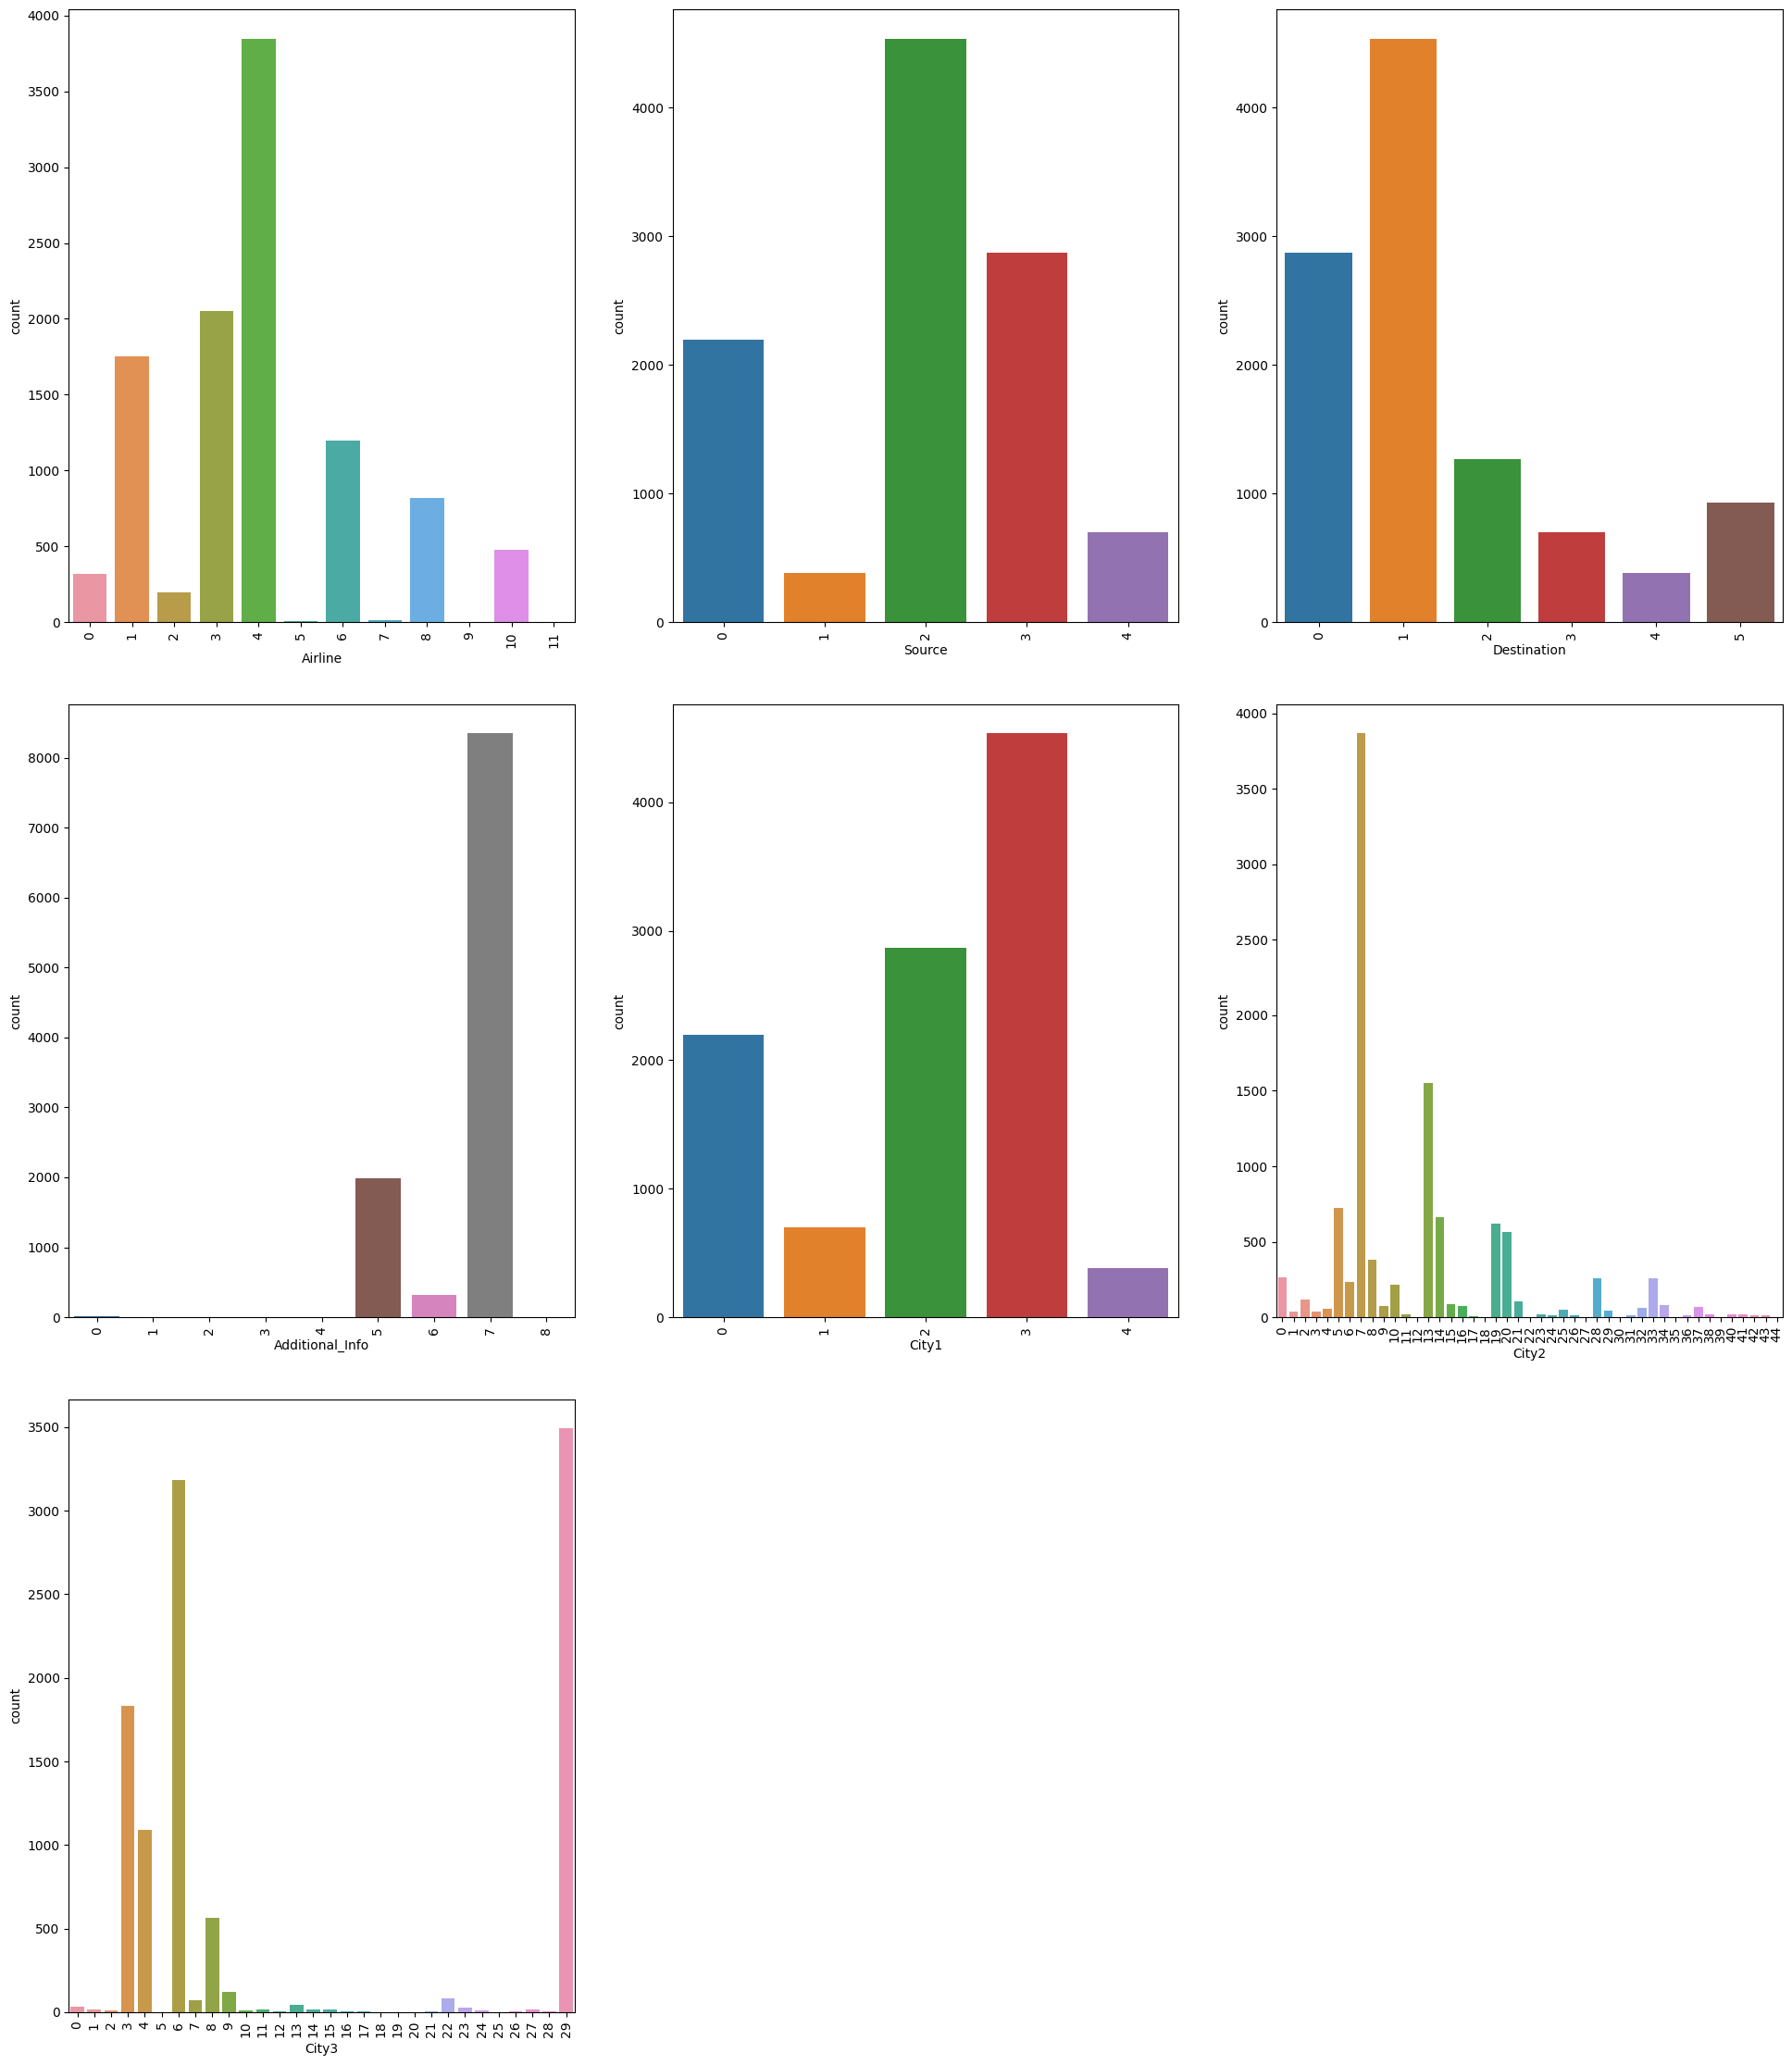

In [56]:
import seaborn as sns
c=1
plt.figure(figsize=(20,45))
for i in categorical:
  plt.subplot(6,3,c)
  sns.countplot(x = data[i])
  plt.xticks(rotation=90)
  plt.tight_layout(pad=3.0)
  c=c+1
  
plt.show()

<Axes: xlabel='Price', ylabel='Density'>

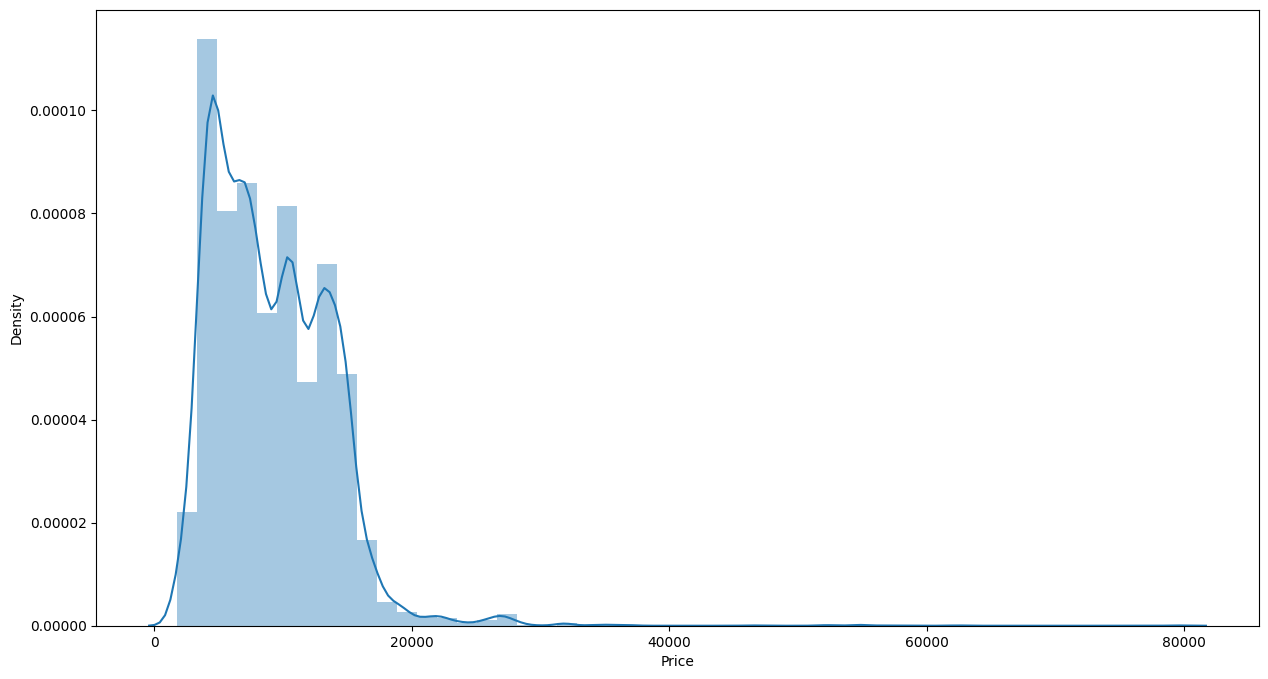

In [57]:
plt.figure(figsize=(15,8))
sns.distplot(data.Price)

<Axes: >

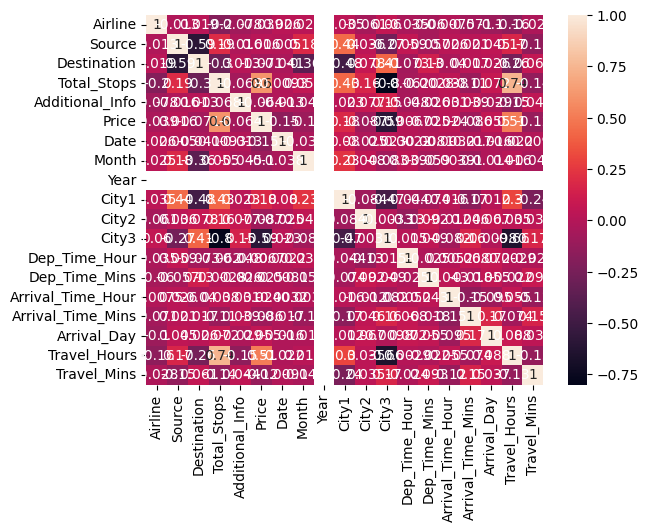

In [58]:
sns.heatmap(data.corr(),annot=True)

<Axes: >

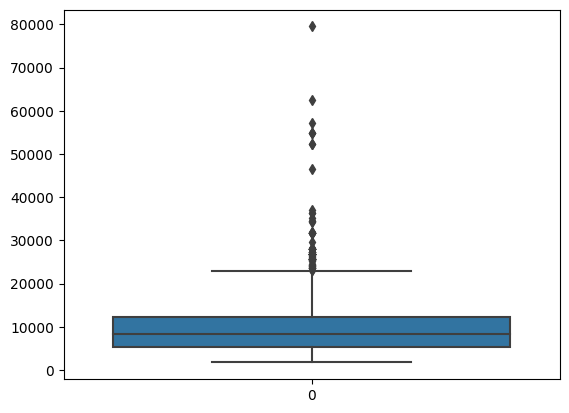

In [59]:
sns.boxplot(data['Price'])

In [60]:
x=fdata.drop('Price',axis=1)
y=fdata['Price']

In [61]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [62]:
xscaled=ss.fit_transform(x)

In [63]:
xscaled=pd.DataFrame(xscaled,columns=x.columns)
xscaled.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_Time_Hour,Arrival_Time_Mins,Arrival_Day
0,-0.410934,-1.658354,2.416648,1.237192,-1.467619,0.0,1.654162,-0.234832,-1.800328,-0.889941,-1.038860
1,-1.261305,0.890262,-0.973718,-1.475375,0.250165,0.0,-1.303018,1.363790,-0.050871,-0.586988,0.962594
2,0.014251,0.040723,-0.295645,-0.531874,1.109057,0.0,-0.607211,0.031605,-1.362964,0.018919,0.962594
3,-0.410934,0.890262,-0.973718,-0.178060,0.250165,0.0,0.958355,-1.034142,1.407010,0.321872,-1.038860
4,-0.410934,-1.658354,2.416648,-1.475375,-1.467619,0.0,0.610452,1.363790,1.115434,0.624825,0.962594


In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=123)

In [65]:
x_train.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_Time_Hour,Arrival_Time_Mins,Arrival_Day
4870,4,2,1,1,6,2019,15,0,12,35,5
1251,4,3,0,12,5,2019,6,30,8,15,5
265,6,2,1,21,3,2019,11,40,1,35,5
1472,8,4,3,21,5,2019,13,15,14,45,5
495,4,3,0,6,5,2019,14,5,9,20,0


In [66]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(x_train,y_train)
    print("Training score: {}".format(model.score(x_train,y_train)))
    predictions = model.predict(x_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.distplot(y_test-predictions)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor


Model is: RandomForestRegressor()
Training score: 0.9536713713353743
Predictions are: [ 8387.60983333 13478.06       14974.655      ... 14587.79
  5911.18       11794.574     ]


r2 score is: 0.7981815078015527
MAE:1236.9047156116385
MSE:3957744.884863966
RMSE:1989.4081745242645


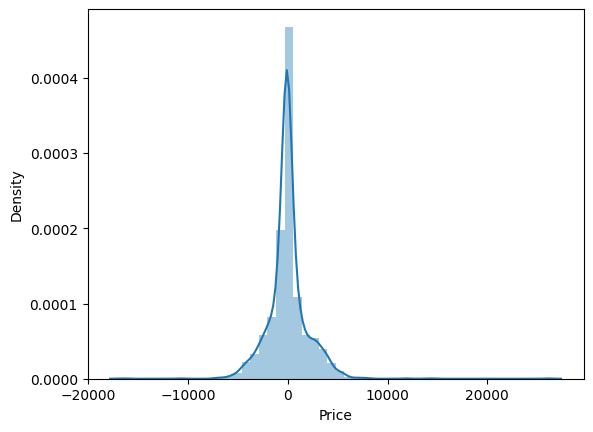

In [68]:
predict(RandomForestRegressor())

Model is: LogisticRegression()
Training score: 0.042837078651685394
Predictions are: [15129  3943 13941 ... 14714 12898  4174]


r2 score is: -0.6631630011302538
MAE:4383.201684604586
MSE:32615320.770238653
RMSE:5710.982469789122


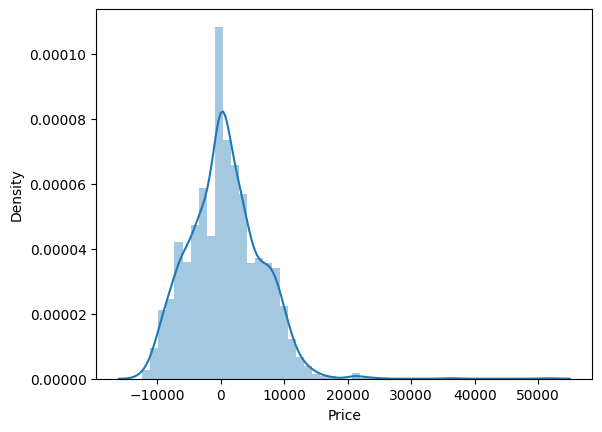

In [69]:
predict(LogisticRegression())

Model is: KNeighborsRegressor()
Training score: 0.7262239247009137
Predictions are: [ 7629.6  9698.6 12907.8 ... 14293.6  6692.4  5291.8]


r2 score is: 0.5066647660821886
MAE:1955.9190453907347
MSE:9674509.889021993
RMSE:3110.387417834311


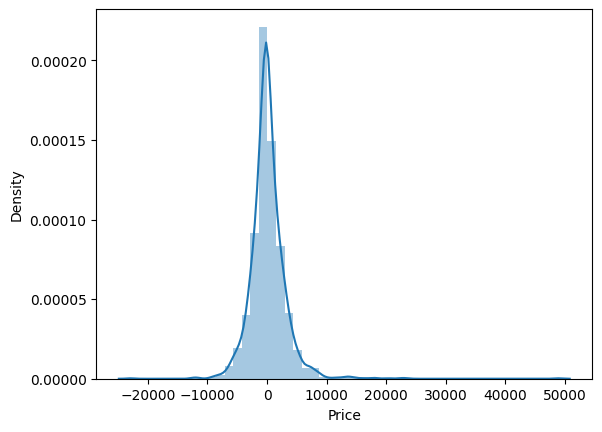

In [70]:
predict(KNeighborsRegressor())

Model is: DecisionTreeRegressor()
Training score: 0.9696975821560773
Predictions are: [ 7618. 13727. 15129. ... 14924.  6171. 12488.]


r2 score is: 0.6799241098881176
MAE:1417.7805490563094
MSE:6276821.826678624
RMSE:2505.3586223689863


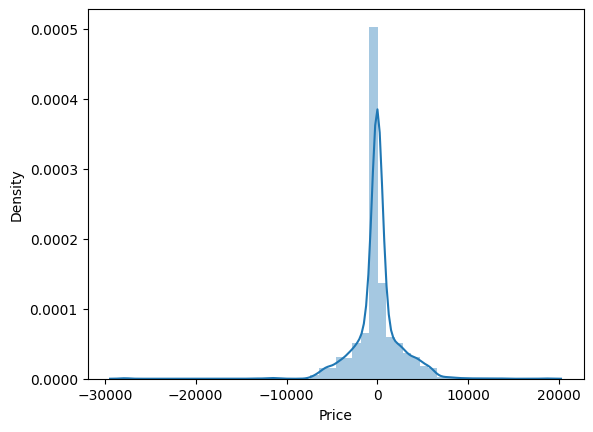

In [71]:
predict(DecisionTreeRegressor())

Model is: SVR()
Training score: -0.025316833905048686
Predictions are: [8372.30814222 8372.10064183 8372.10281517 ... 8372.39456263 8372.21469149
 8372.10552597]


r2 score is: -0.01888404968044255
MAE:3507.694654077979
MSE:19980741.566174872
RMSE:4469.982278060493


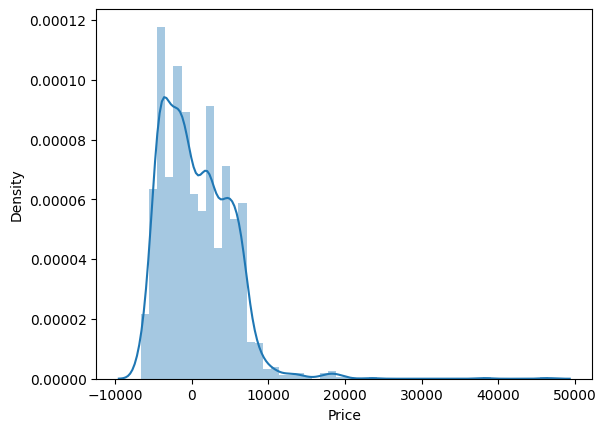

In [72]:
from sklearn.svm import SVR
predict(SVR())

Model is: GradientBoostingRegressor()
Training score: 0.7432674171188071
Predictions are: [10240.2533732  11191.99025903 12475.08997158 ... 12782.76349772
  5187.48765406 11599.11714502]


r2 score is: 0.7311683133344324
MAE:1678.174282114293
MSE:5271901.604258386
RMSE:2296.0621952069127


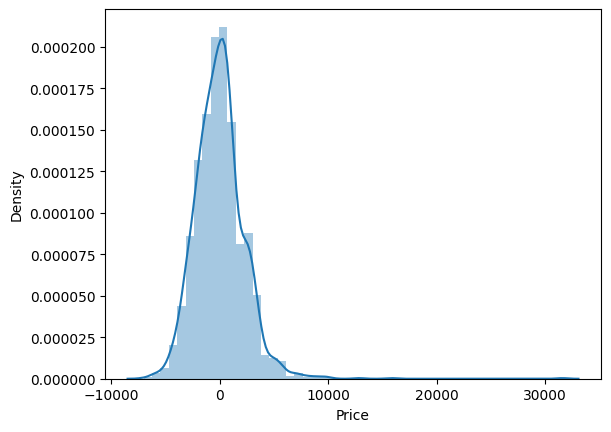

In [73]:
predict(GradientBoostingRegressor())

**Hypertunning the model**

In [74]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [75]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(x_train,y_train)

# best parameter
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 100, 'max_features': 'auto', 'max_depth': 15}

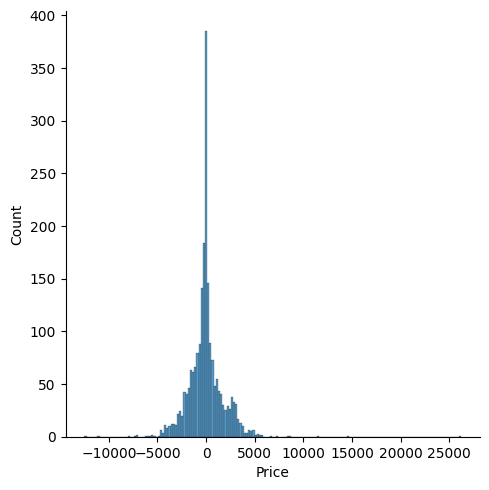

In [76]:
#predicting the values
prediction = rf_random.predict(x_test)

#distribution plot between actual value and predicted value
sns.displot(y_test-prediction)

In [77]:
r2_score(y_test,prediction)

0.8224919100288186

In [79]:
pickle.dump(rf,open("rf.pkl",'wb'))